## Discretization

In [1]:
import numpy as np
import pandas as pd

In [6]:
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [7]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [8]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(714, 3)

In [11]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [13]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2,random_state =42)

In [74]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6153846153846154

In [20]:
np.mean(cross_val_score(clf,X,y,cv=10,scoring='accuracy'))

0.6330790297339592

In [23]:
kbin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [26]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])])

In [27]:
X_train_trans=trf.fit_transform(X_train)
X_test_trans =trf.transform(X_test)

In [36]:
trf.named_transformers_['first'].n_bins

10

In [38]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [43]:
output=pd.DataFrame({
    'age':X_train['Age'],
    'age_trans':X_train_trans[:,0],
    'fare':X_train['Fare'],
    'fare_trans':X_train_trans[:,1]})

In [44]:
output.head()

,age,age_trans,fare,fare_trans
328,31.0,5.0,20.5250,5.0
73,26.0,4.0,14.4542,4.0
253,30.0,5.0,16.1000,5.0
719,33.0,6.0,7.7750,1.0
666,25.0,4.0,13.0000,4.0


In [47]:
output['age_labels']=pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [48]:
output.head()

,age,age_trans,fare,fare_trans,age_labels,fare_labels
328,31.0,5.0,20.5250,5.0,"(28.5, 32.0]","(15.75, 26.0]"
73,26.0,4.0,14.4542,4.0,"(25.0, 28.5]","(13.0, 15.75]"
253,30.0,5.0,16.1000,5.0,"(28.5, 32.0]","(15.75, 26.0]"
719,33.0,6.0,7.7750,1.0,"(32.0, 36.0]","(7.75, 7.896]"
666,25.0,4.0,13.0000,4.0,"(22.0, 25.0]","(9.225, 13.0]"


In [56]:
def Discretize(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy=strategy)
    trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])])
    X_trf=trf.fit_transform(X)
    print(np.mean(cross_val_score(clf,X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('before')

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('after')
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('before')

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title('after')
    plt.show()
    

0.6331181533646322


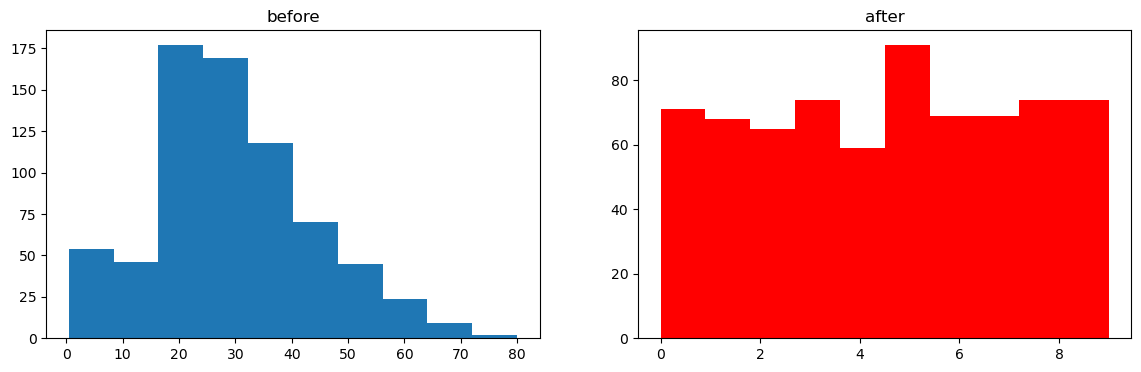

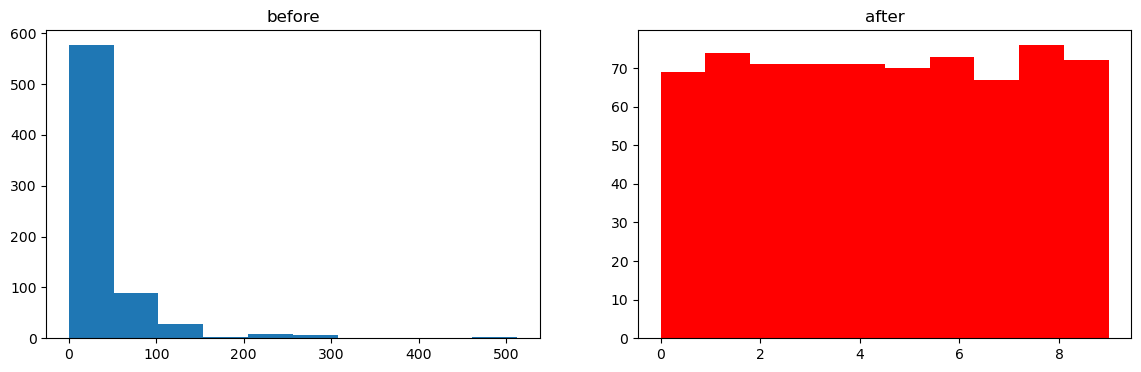

In [57]:
Discretize(10,'quantile')

## Binarization

In [59]:
df1=pd.read_csv('train.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [60]:
df1.dropna(inplace=True)

In [61]:
df1['family']=df1['SibSp']+df1['Parch']

In [62]:
df1

,Age,Fare,SibSp,Parch,Survived,family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0
...,...,...,...,...,...,...
885,39.0,29.1250,0,5,0,5
886,27.0,13.0000,0,0,0,0
887,19.0,30.0000,0,0,1,0
889,26.0,30.0000,0,0,1,0


In [71]:
df1.drop(columns=['SibSp','Parch'],inplace=True)

In [72]:
X=df1.drop(columns=['Survived'])
y=df1['Survived']

In [73]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2,random_state =42)

In [86]:
# without binarization
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
accuracy_score(y_test,y_pred)


0.6293706293706294

In [87]:
np.mean(cross_val_score(clf,X,y,cv=10,scoring='accuracy'))

0.6584115805946792

In [88]:
from sklearn.preprocessing import Binarizer

In [89]:
# on applying binarization
trf=ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])],remainder='passthrough')


In [90]:
X_train_trf =trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [91]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [92]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred1= clf.predict(X_test_trf)
accuracy_score(y_test,y_pred1)

0.6223776223776224

In [93]:
X_trf=trf.fit_transform(X)
np.mean(cross_val_score(clf,X_trf,y,cv=10,scoring='accuracy'))

0.6360328638497654